In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Preprocess and Prepare Data

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
    
# variable information 
statlog_german_credit_data.variables


,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [4]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [5]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [6]:
from sklearn.preprocessing import OneHotEncoder


cat_attr = list(statlog_german_credit_data.variables[statlog_german_credit_data.variables.type == "Categorical"].name)
numerical_features = X.drop(columns=cat_attr)
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_attr])
feature_names = encoder.get_feature_names_out(cat_attr)
df_encoded = pd.DataFrame(X_encoded, columns=feature_names)
df_final = pd.concat([numerical_features, df_encoded], axis=1)

In [7]:
from sklearn.preprocessing import MinMaxScaler


num_attr = list(statlog_german_credit_data.variables[statlog_german_credit_data.variables.type == "Integer"].name)
scaler = MinMaxScaler()
df_final[num_attr] = scaler.fit_transform(df_final[num_attr])

In [8]:
# df_final.hist(figsize=(25, 15))

In [9]:
# map all columns to proper attribute names

attribute_mapping = {
    'Attribute1_A11': 'Status checking account: lt 0 DM',
    'Attribute1_A12': 'Status checking account: 0 lte ... lt 200 DM',
    'Attribute1_A13': 'Status checking account: gte 200 DM ',
    'Attribute1_A14': 'Status checking account: no checking account',

    'Attribute2': 'Duration in month',

    'Attribute3_A30': 'Credit history: no credits taken / all credits paid back duly',
    'Attribute3_A31': 'Credit history: all credits at this bank paid back duly',
    'Attribute3_A32': 'Credit history: existing credits paid back duly till now',
    'Attribute3_A33': 'Credit history: delay in paying off in the past',
    'Attribute3_A34': 'Credit history: critical account / other credits existing',

    'Attribute4_A40': 'Purpose: car (new)',
    'Attribute4_A41': 'Purpose: car (used)',
    'Attribute4_A42': 'Purpose: furniture/equipment',
    'Attribute4_A43': 'Purpose: radio/television',
    'Attribute4_A44': 'Purpose: domestic appliances',
    'Attribute4_A45': 'Purpose: repairs',
    'Attribute4_A46': 'Purpose: education',
    'Attribute4_A48': 'Purpose: retraining',
    'Attribute4_A49': 'Purpose: business',
    'Attribute4_A410': 'Purpose: others',

    'Attribute5': 'Credit amount',

    'Attribute6_A61': 'Savings account/bonds: lt 100 DM',
    'Attribute6_A62': 'Savings account/bonds: 100 lte ... lt 500 DM',
    'Attribute6_A63': 'Savings account/bonds: 500 lte ... lt 1000 DM',
    'Attribute6_A64': 'Savings account/bonds: gte 1000 DM',
    'Attribute6_A65': 'Savings account/bonds: unknown / no savings account',

    'Attribute7_A71': 'Present employment since: unemployed',
    'Attribute7_A72': 'Present employment since: lt 1 year',
    'Attribute7_A73': 'Present employment since: 1 lte ... lt 4 years',
    'Attribute7_A74': 'Present employment since: 4 lte ... lt 7 years',
    'Attribute7_A75': 'Present employment since: gte 7 years',

    'Attribute8': 'Installment rate in percentage of disposable income',

    'Attribute9_A91': 'Personal status and sex: male - divorced/separated',
    'Attribute9_A92': 'Personal status and sex: female - divorced/separated/married',
    'Attribute9_A93': 'Personal status and sex: male - single',
    'Attribute9_A94': 'Personal status and sex: male - married/widowed',

    'Attribute10_A101': 'Other debtors / guarantors: none',
    'Attribute10_A102': 'Other debtors / guarantors: co-applicant',
    'Attribute10_A103': 'Other debtors / guarantors: guarantor',

    'Attribute11': 'Present residence since',

    'Attribute12_A121': 'Property: real estate',
    'Attribute12_A122': 'Property: building society savings agreement / life insurance',
    'Attribute12_A123': 'Property: car or other, not in attribute 6',
    'Attribute12_A124': 'Property: unknown / no property',

    'Attribute13': 'Age in years',

    'Attribute14_A141': 'Other installment plans: bank',
    'Attribute14_A142': 'Other installment plans: stores',
    'Attribute14_A143': 'Other installment plans: none',

    'Attribute15_A151': 'Housing: rent',
    'Attribute15_A152': 'Housing: own',
    'Attribute15_A153': 'Housing: for free',

    'Attribute16': 'Number of existing credits at this bank',

    'Attribute17_A171': 'Job: unemployed/unskilled - non-resident',
    'Attribute17_A172': 'Job: unskilled - resident',
    'Attribute17_A173': 'Job: skilled employee/official',
    'Attribute17_A174': 'Job: management/self-employed/highly qualified employee/officer',

    'Attribute18': 'nr of ppl being liable to provide maintenance for',

    'Attribute19': 'Telephone: none / yes',

    'Attribute20': 'Foreign worker'
}

df_final.rename(columns=attribute_mapping, inplace=True)

array([[<Axes: title={'center': 'Duration in month'}>,
        <Axes: title={'center': 'Credit amount'}>],
       [<Axes: title={'center': 'Age in years'}>, <Axes: >]], dtype=object)

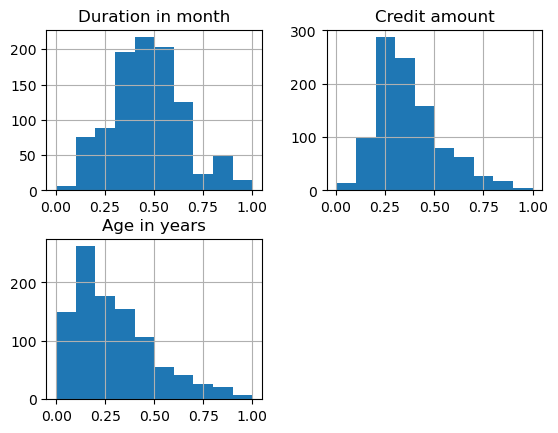

In [10]:
df_final["Duration in month"] = np.sqrt(df_final["Duration in month"] + 0.00001)
df_final["Credit amount"] = np.sqrt(df_final["Credit amount"] + 0.00001)
# df_final["Attribute13"] = np.sqrt(df_final["Attribute13"] + 0.00001)

df_final[["Duration in month", "Credit amount", "Age in years"]].hist()

In [11]:
df_final["Telephone: none / yes"] = df_final["Telephone: none / yes"].map({"A192": 1, "A191": 0})
df_final["Foreign worker"] = df_final["Foreign worker"].map({"A202": 0, "A201": 1})

y["class"] = y["class"].map({1: 1, 2: 0})

C:\Users\William\AppData\Local\Temp\ipykernel_84400\3908953982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y["class"].map({1: 1, 2: 0})


In [12]:
df_final.duplicated().sum()

0

# Analyze Data

Text(0.5, 1.0, 'target class distribution')

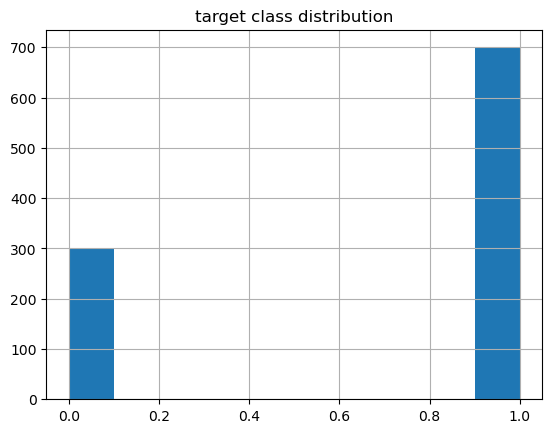

In [13]:
y.hist()
plt.title("target class distribution")

In [14]:
num_attr = [attribute_mapping.get(col, col) for col in num_attr]

Text(0.5, 1.0, 'Correlation Matrix')

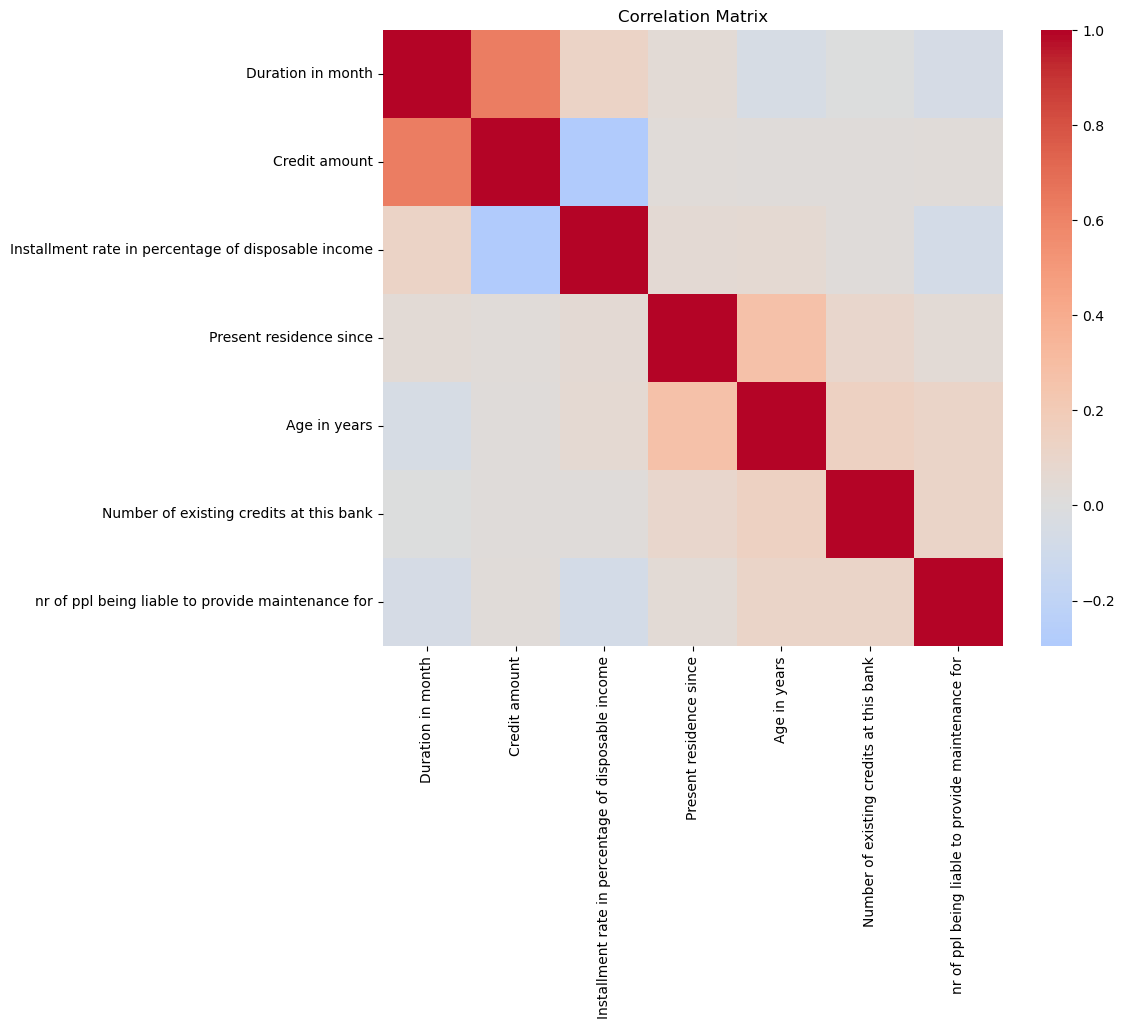

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = df_final[num_attr].corr() 
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")

# the numerical features are not that much correlated

Text(0.5, 0.98, 'numerical feature box plots')

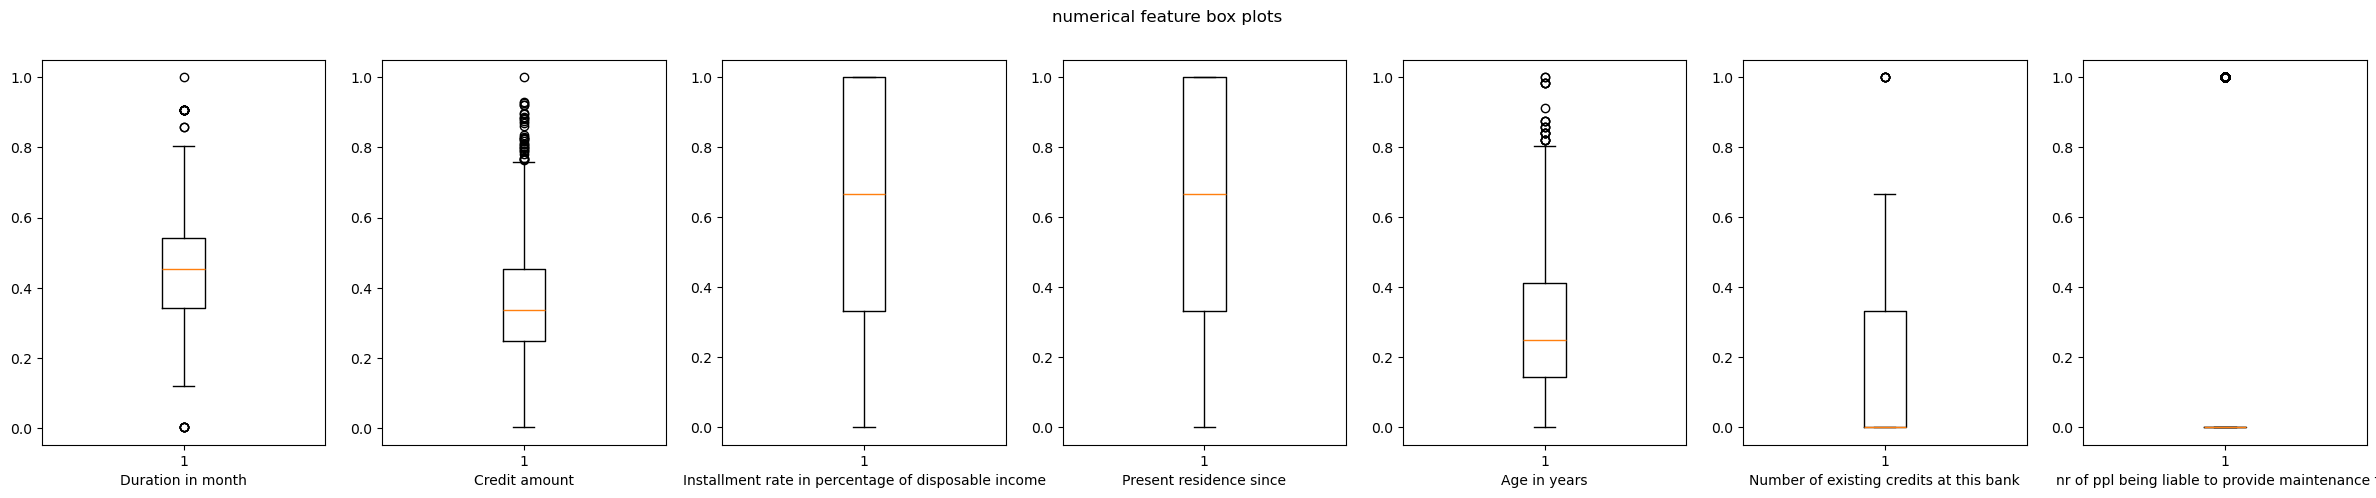

In [16]:
fig, ax = plt.subplots(1, 7, figsize=(30, 5))

for i, att in enumerate(num_attr):
    ax[i].boxplot(df_final[att])
    ax[i].set_xlabel(att)
    
fig.suptitle("numerical feature box plots")

# Analyze Data Focusing on Protected Attribute

candidates for protected attributes:
- Attribute9	Feature	Categorical	Marital Status	Personal status and sex	
- Attribute13	Feature	Integer	Age	years
- Attribute20	Feature	Binary	Other	foreign worker

potentially protected attributes:
- Attribute6	Feature	Categorical		Savings account/bonds
- Attribute7	Feature	Categorical	Other	Present employment since
- Attribute12	Feature	Categorical		Property
- Attribute15	Feature	Categorical	Other	Housing
- Attribute17	Feature	Categorical	Occupation	Job
- Attribute19	Feature	Binary		Telephone

In [17]:
data = df_final

In [18]:
protected_attributes = ["Age in years", "Foreign worker", "Personal status and sex: male - divorced/separated", "Personal status and sex: female - divorced/separated/married", "Personal status and sex: male - single", "Personal status and sex: male - married/widowed"]

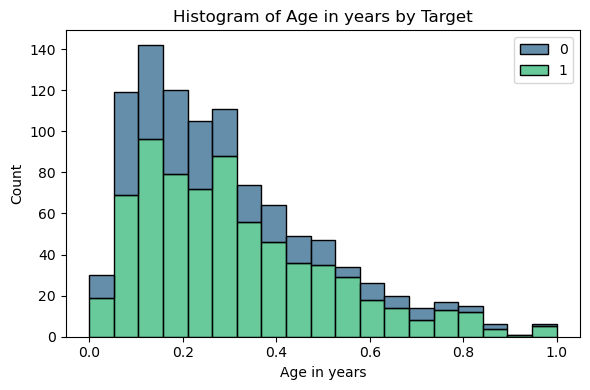

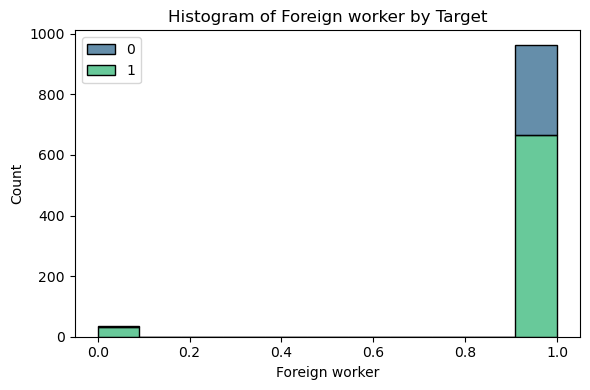

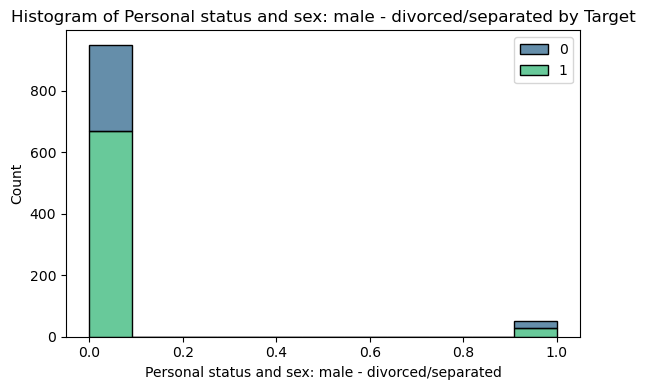

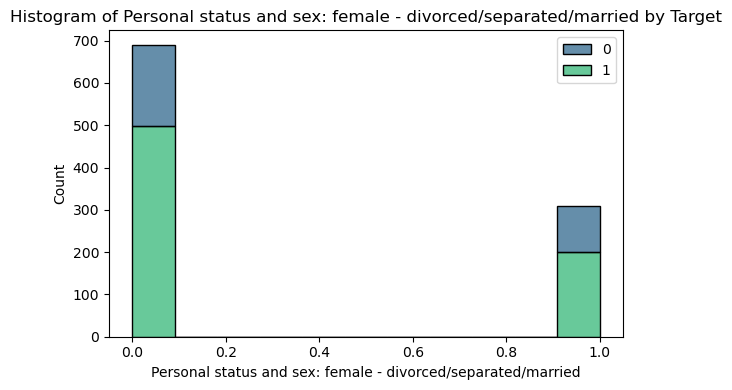

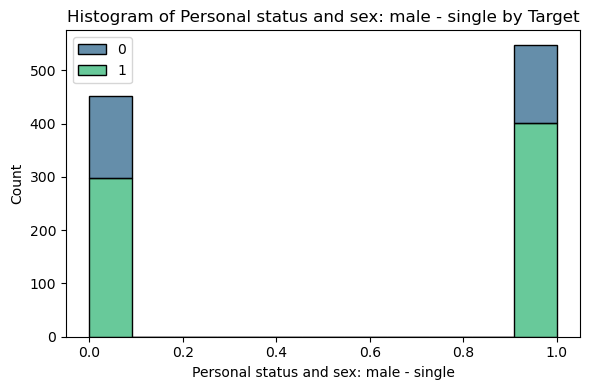

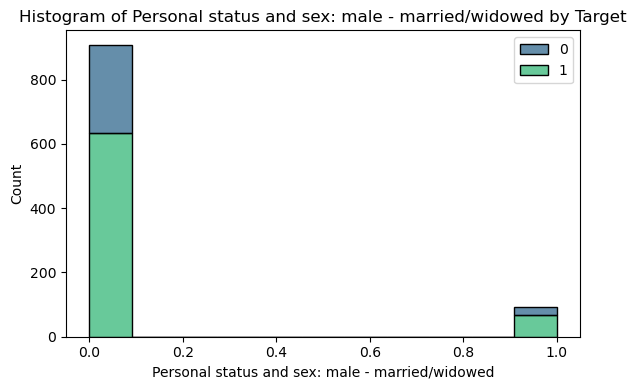

In [19]:
for col in protected_attributes:    
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=col, hue=y["class"].values, palette='viridis', multiple='stack')
    plt.title(f"Histogram of {col} by Target")
    plt.tight_layout()
    plt.show()


In [20]:
data["Age in years"] = np.sqrt(data["Age in years"] + 0.00001)

# normalise the data

## observations
- No single females
- there are more divorced females than males
- Age is skewed
- there are just a few foreign workers
- males are about 50/50 single or not

Text(0.5, 1.0, 'Gender Count')

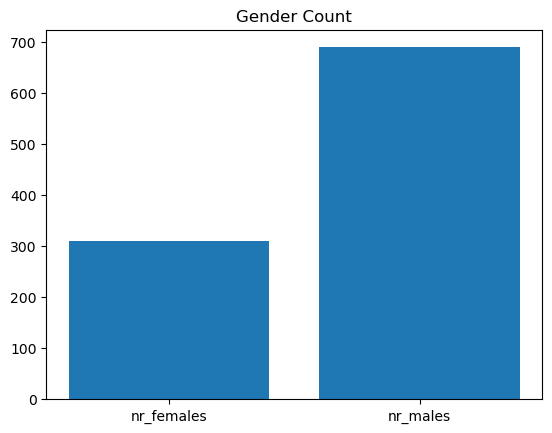

In [21]:
nr_males = (X["Attribute9"][(X["Attribute9"] == "A91") | (X["Attribute9"] == "A93") | (X["Attribute9"] == "A94")]).count()
nr_females = (X["Attribute9"][(X["Attribute9"] == "A92") | (X["Attribute9"] == "A95")]).count()

plt.bar(x=["nr_females", "nr_males"], height=[nr_females, nr_males])
plt.title("Gender Count")

# Develop Machine Learning Models and Evaluate their Performance

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [150, 155, 160],
    'max_depth': [None, 1, 2],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    scoring='f1',   # we use f1 since data is inbalanced
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\William\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 160}

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.37      0.49        59
           1       0.78      0.94      0.86       141

    accuracy                           0.78       200
   macro avg       0.76      0.66      0.67       200
weighted avg       0.77      0.78      0.75       200



In [23]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_grid = {
    'n_estimators': [75, 85, 95],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.3, 0.4, 0.5],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\William\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:08:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 95, 'subsample': 0.4}

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.83      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,), (150,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.08, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\William\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'activation': 'tanh', 'alpha': 0.2, 'hidden_layer_sizes': (150,)}

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.62        59
           1       0.84      0.84      0.84       141

    accuracy                           0.78       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.77      0.78      0.77       200



c:\Users\William\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Explain the ML model(s) using an XAI technique

In [25]:
import shap
import shap.plots

In [26]:
"""rf_explainer = shap.TreeExplainer(best_rf, X_test)
rf_shap_values = rf_explainer(X_test)
rf_shap_values.values = rf_shap_values.values[:, :, 1]"""

xgb_explainer = shap.TreeExplainer(best_model) 
xgb_shap_values = xgb_explainer(X_test)

"""less_samples = shap.sample(X_test, int(len(X_test)*0.1))
mlp_explainer = shap.KernelExplainer(best_mlp.predict_proba, less_samples)
mlp_shap_values = mlp_explainer(X_test)
mlp_shap_values.values = mlp_shap_values.values[:, :, 1]"""

'less_samples = shap.sample(X_test, int(len(X_test)*0.1))\nmlp_explainer = shap.KernelExplainer(best_mlp.predict_proba, less_samples)\nmlp_shap_values = mlp_explainer(X_test)\nmlp_shap_values.values = mlp_shap_values.values[:, :, 1]'

In [27]:
prot_att_idx = np.where(data.columns.isin(protected_attributes))[0]
prot_att_shap_vals = xgb_shap_values[:, prot_att_idx]

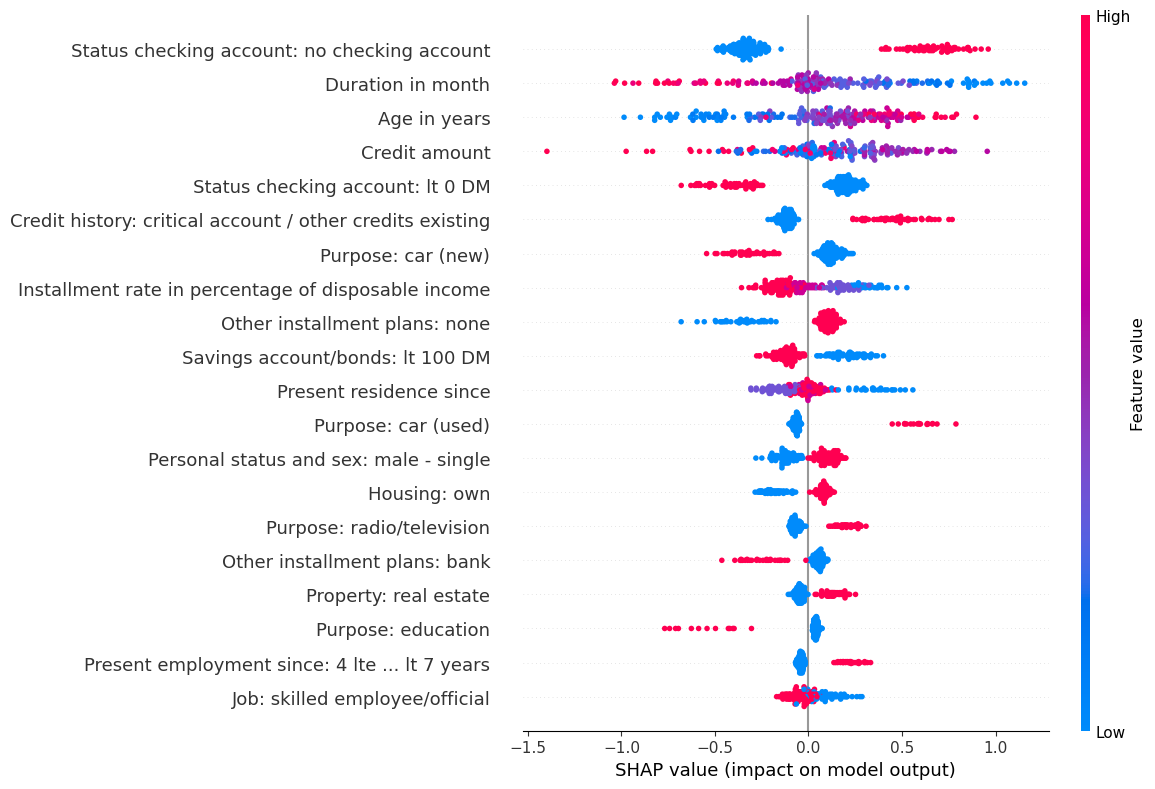

In [28]:
shap.summary_plot(xgb_shap_values, X_test, plot_size=(12, 8))

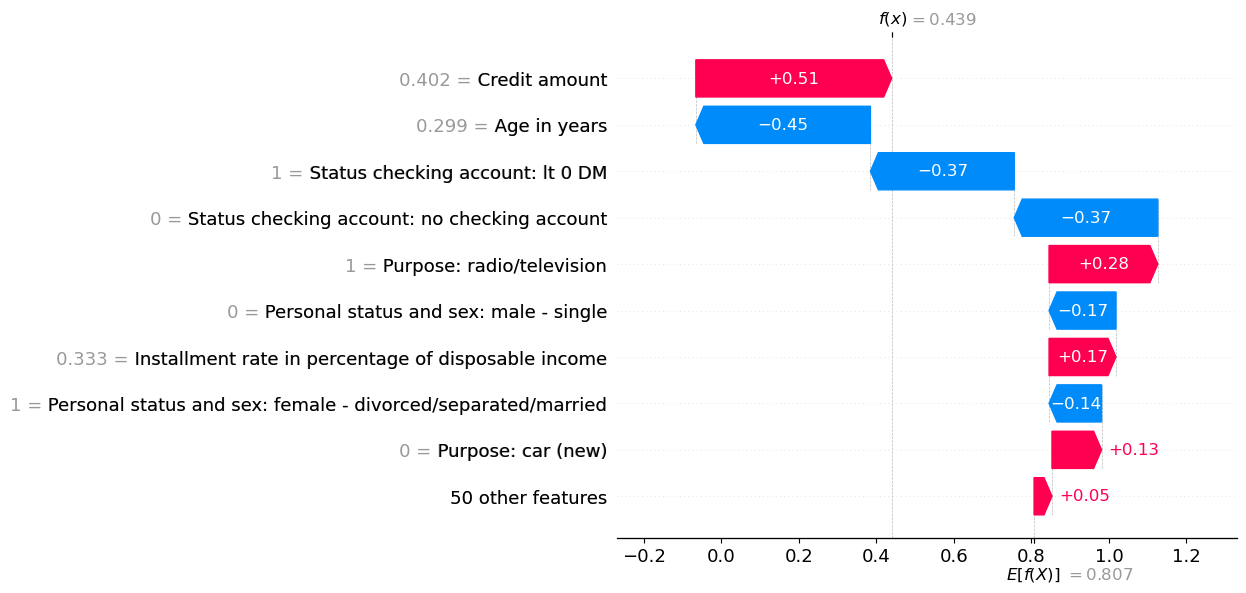

In [29]:
shap.plots.waterfall(xgb_shap_values[0])

# explanation for the first sample

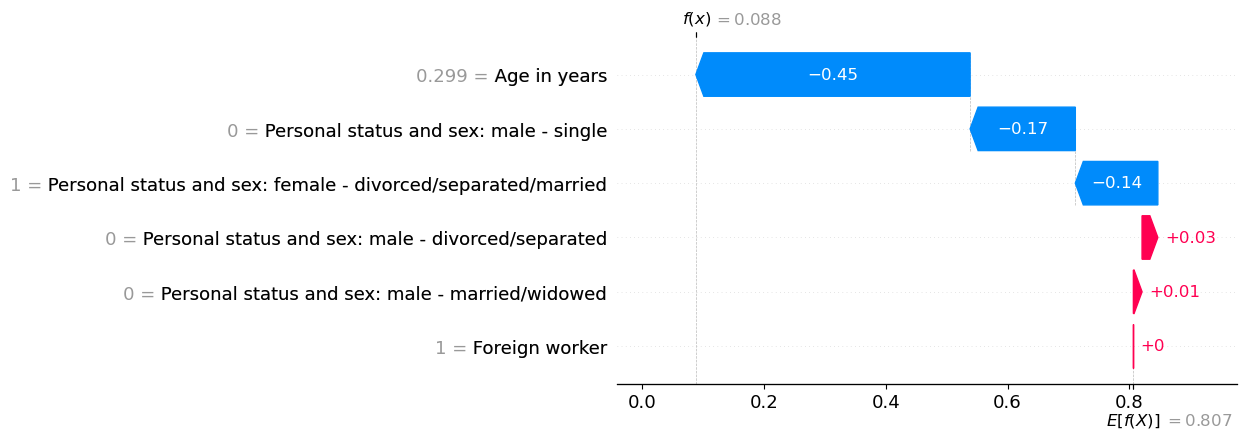

In [30]:
shap.plots.waterfall(prot_att_shap_vals[0])

In [44]:
foreign_workers = X_test.reset_index()[X_test.reset_index()["Foreign worker"] == 0].index

# find foreign workers in X_test

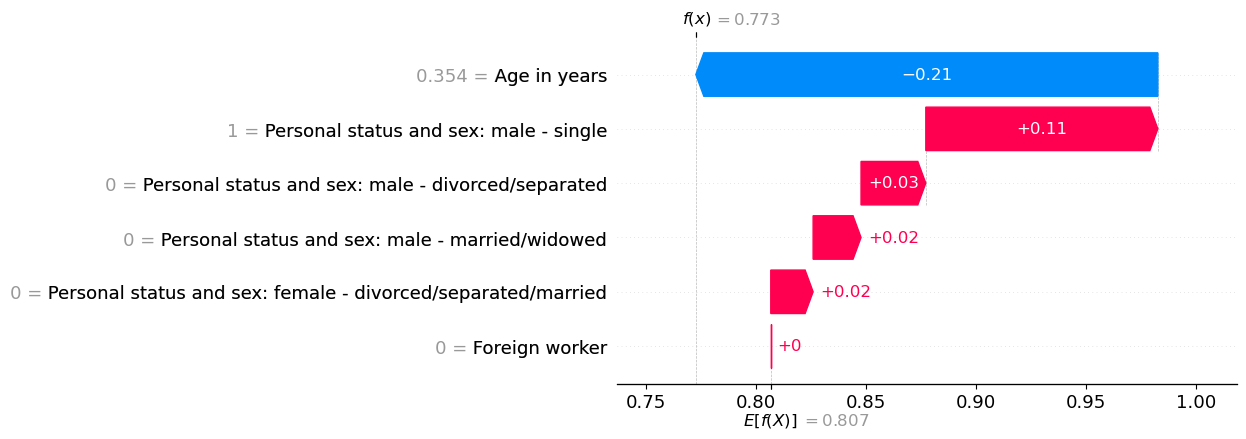

In [45]:
shap.plots.waterfall(prot_att_shap_vals[foreign_workers[0]])

# see if the waterfall plot is different for a foreign worker

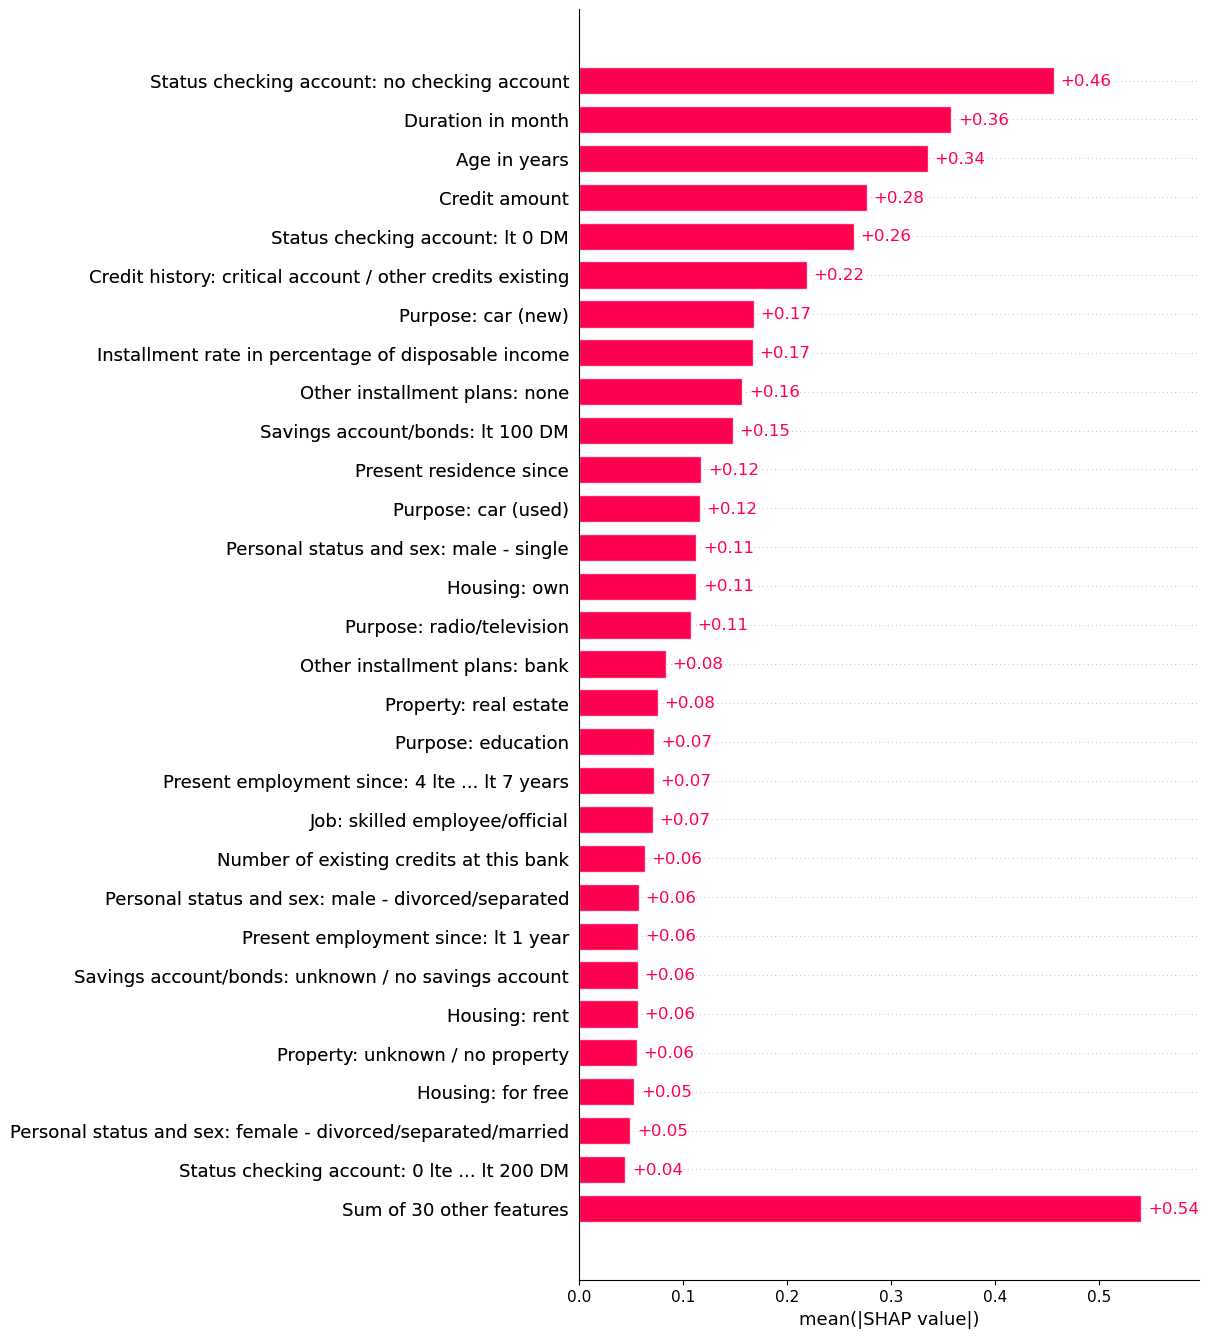

In [33]:
shap.plots.bar(xgb_shap_values, max_display=30)

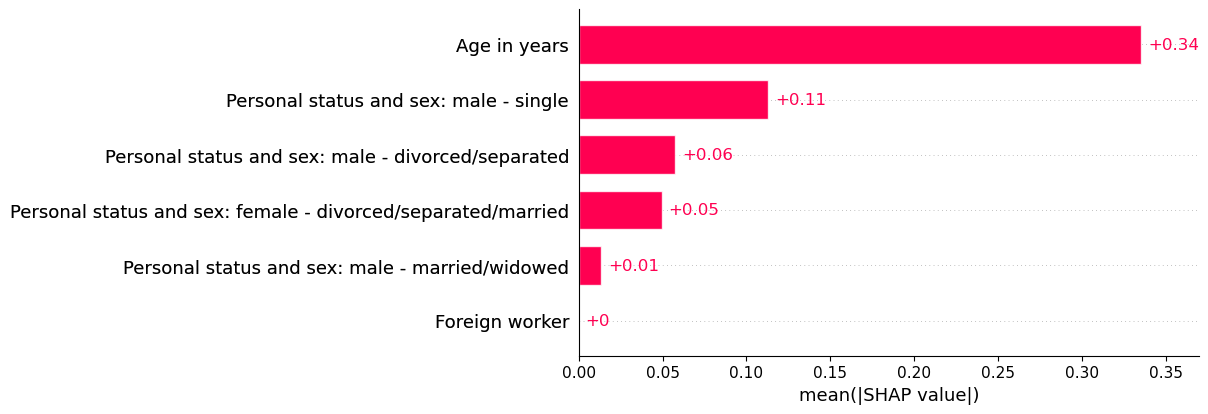

In [34]:
shap.plots.bar(prot_att_shap_vals)

# protected attribute influence

In [35]:
shap.initjs()
shap.plots.force(xgb_shap_values)

In [36]:
X_test

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,nr of ppl being liable to provide maintenance for,Telephone: none / yes,Foreign worker,Status checking account: lt 0 DM,...,Other installment plans: bank,Other installment plans: stores,Other installment plans: none,Housing: rent,Housing: own,Housing: for free,Job: unemployed/unskilled - non-resident,Job: unskilled - resident,Job: skilled employee/official,Job: management/self-employed/highly qualified employee/officer
521,0.453754,0.402218,0.333333,0.333333,0.298824,0.000000,0.0,0,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
737,0.453754,0.476716,0.666667,1.000000,0.534532,0.000000,1.0,1,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
740,0.542335,0.337911,0.333333,0.666667,0.481822,0.000000,0.0,0,1,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
660,0.343012,0.240041,0.666667,1.000000,0.267280,0.000000,0.0,0,1,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
411,0.653055,0.620758,0.666667,0.333333,0.534532,0.333333,0.0,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.542335,0.405285,0.666667,0.333333,0.353568,0.000000,0.0,1,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
332,0.907491,0.627590,1.000000,0.333333,0.298824,0.000000,0.0,0,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
208,0.542335,0.589618,0.333333,0.333333,0.189009,0.000000,0.0,0,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
613,0.542335,0.431393,0.000000,1.000000,0.231477,0.000000,0.0,0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


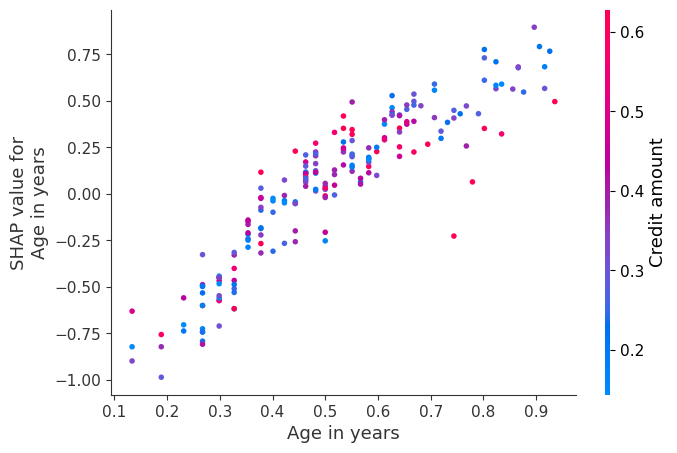

In [37]:
shap.dependence_plot("Age in years", xgb_shap_values.values, X_test)

# Enhance the Fairness of the ML Model

# Explain the ML Model Developed with Enhanced Fairness

# Compare Performance of ML Models

# Analyze Change in Behavior Qualitatively

# Quantify Change in Behavior Across Explanations

In [38]:
# compute distance between the teo shap value dataframes 